## Simulate time series using fitted ARIMA model:

In [1]:
#-----------------IMPORTS-----------------#
from numba import njit
import pandas as pd #we separately import pandas to read data from a csv file
import numpy as np

#-----------------DATA-----------------#
#1min EURGBP data
url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339325&authkey=!AHOCBUokDjDiCc8"

#1 second EURGBP data
#url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339754&authkey=!ACcJZZPFqOmKVUY"

data_downloaded = pd.read_csv(url, parse_dates = True, index_col=0) #it's a time series data, so I'm setting the index to be the first column
data_downloaded = data_downloaded.asfreq('T')
data_downloaded.ffill(inplace=True)
print(data_downloaded.index.freq)
#close = data_downloaded["close"].to_numpy() #We transform the close prices into a numpy array

<Minute>


In [ ]:
### Fit using sktime
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(maxiter=100, stepwise=False, n_jobs=-1)
forecaster.fit(data_downloaded["close"])
forecaster.get_fitted_params()

In [ ]:
### Fitted SARIMA parameters:
{'intercept': -5.398901140173307e-08,
 'ma.L1': -0.1042188993634203,
 'ma.L2': -0.029764115450367442,
 'ma.L3': -0.002917953581047072,
 'ma.L4': 0.004290940137585559,
 'ma.L5': -0.012028812812397361,
 'sigma2': 2.956406656496939e-09,
 'order': (0, 1, 5),
 'seasonal_order': (0, 0, 0, 1),
 'aic': -5639035.469712176,
 'aicc': -5639035.469378472,
 'bic': -5638960.403255404,
 'hqic': -5639013.861095114}

In [3]:
import statsmodels.api as sm

p, d, q = 0, 1, 5

model = sm.tsa.ARIMA(data_downloaded["close"], order=(p, d, q))
model_fit = model.fit()

c:\Users\camere\Conda_3.10_enviroment\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
model_fit.summary() #it's identical to the one calculated by sktime

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:               335636
Model:                 ARIMA(0, 1, 5)   Log Likelihood             2819473.453
Date:                Tue, 27 Aug 2024   AIC                       -5638934.905
Time:                        10:46:55   BIC                       -5638870.563
Sample:                    01-01-2024   HQIC                      -5638916.384
                         - 08-21-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1042   1.72e-21  -6.06e+19      0.000      -0.104      -0.104
ma.L2         -0.0298   1.11e-22  -2.69e+20      0.000      -0.030      -0.030
ma.L3         -0.0029   6.85e-23  -4.26e+19      0.000      -0.003      -0.003
ma.L4          0.0043   1.86e-22    2.3e+19      0.000       0.004       0.004
ma.L5         -0.0120   3.04e-23  -3.96e+20      0.000      -0.012      -0.012
sigma2      2.956e-09   1.02e-12   2885.716      0.000    2.95e-09    2.96e-09
===================================================================================
Ljung-Box (L1) (Q):                   9.92   Jarque-Bera (JB):         374835407.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                       166.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.42e+51. Standard errors may be unstable.
"""

In [10]:
simulated_series = model_fit.simulate(nsimulations=len(data_downloaded["close"]))
print(simulated_series)

timestamp
2024-01-01 22:04:00    388.437794
2024-01-01 22:05:00    388.437865
2024-01-01 22:06:00    388.437899
2024-01-01 22:07:00    388.437916
2024-01-01 22:08:00    388.437897
                          ...    
2024-08-21 23:55:00    388.409206
2024-08-21 23:56:00    388.409061
2024-08-21 23:57:00    388.409016
2024-08-21 23:58:00    388.409020
2024-08-21 23:59:00    388.409047
Freq: T, Name: close, Length: 335636, dtype: float64


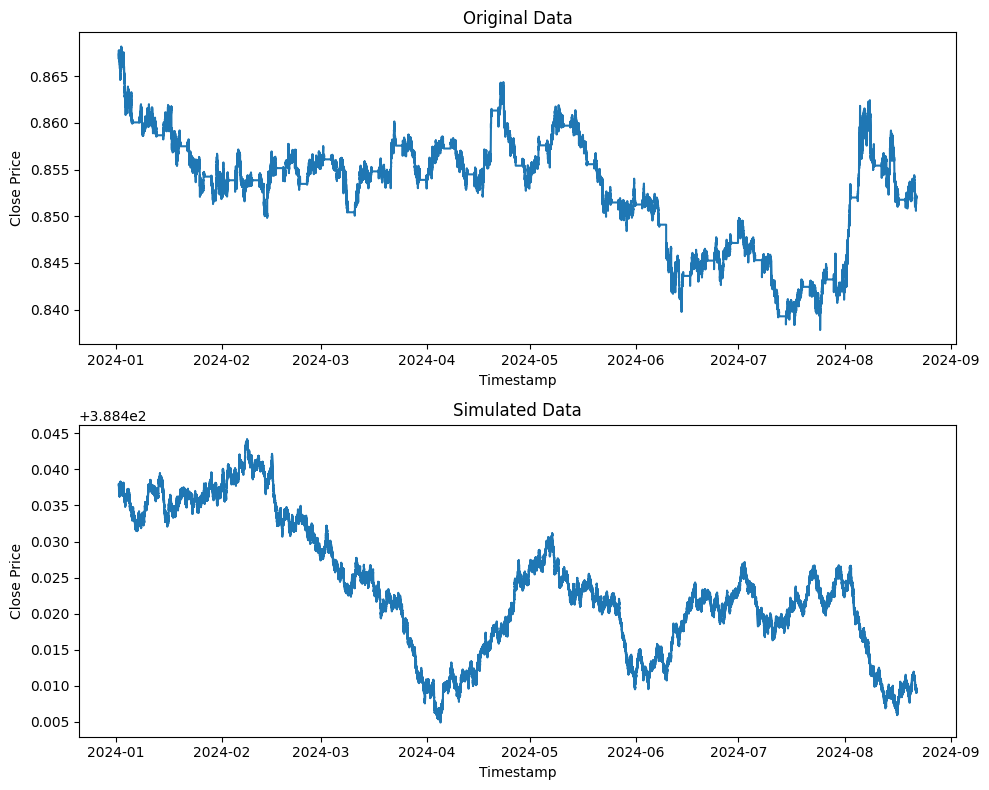

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1
axes[0].plot(data_downloaded.index, data_downloaded['close'])
axes[0].set_title('Original Data')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Close Price')

# Plot 2
axes[1].plot(data_downloaded.index, simulated_series)
axes[1].set_title('Simulated Data')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Close Price')

plt.tight_layout()
plt.show()